Import libraries and dataset from Scikit-Learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits

digits = load_digits()

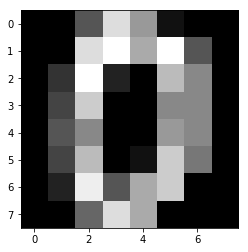

In [21]:
plt.imshow(digits.images[0]) 

Analyze image pixels

Each element represents the pixel of our greyscale image. The value ranges from 0 to 255 for an 8 bit pixel.

In [22]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualize first 20 images

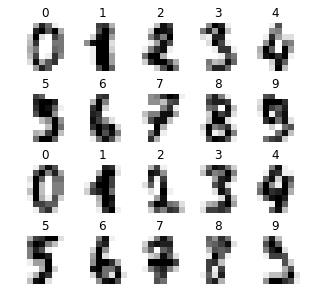

In [26]:
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize = (5,5))
for index, (image, label) in enumerate(images_and_labels[:20]):
    plt.subplot(4,5,index +1)
    plt.axis('off')
    plt.imshow(image,cmap =plt.cm.gray_r, interpolation ='nearest') 
    plt.title('%i' % label)

Random Forest Classifier Algorithm for Digit Recognition

In [ ]:
#Define variables
n_samples = len(digits.images)
x = digits.images.reshape((n_samples, -1))
y = digits.target

In [36]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target,test_size=0.2, random_state=42)
print("x_train",x_train)
print("x_test",x_test)
print("y_train",y_train)
print("y_test",y_test)

x_train [[ 0.  0.  3. ... 13.  4.  0.]
 [ 0.  0.  9. ...  3.  0.  0.]
 [ 0.  0.  0. ...  6.  0.  0.]
 ...
 [ 0.  0.  9. ... 16.  2.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 [ 0.  0.  1. ...  1.  0.  0.]]
x_test [[ 0.  0.  0. ... 14.  5.  0.]
 [ 0.  0. 11. ...  1.  0.  0.]
 [ 0.  0.  8. ...  8.  0.  0.]
 ...
 [ 0.  0.  7. ... 10.  0.  0.]
 [ 0.  0.  7. ... 16.  4.  0.]
 [ 0.  0. 14. ...  5.  0.  0.]]
y_train [6 0 0 ... 2 7 1]
y_test [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 

C:\Users\lalit\Miniconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
digits.data.shape

(1797, 64)

In [39]:
digits.images.shape

(1797, 8, 8)

In [40]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [45]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
y_pred =model.predict(x_test)
y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 4, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 8, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

We can take a look at the classification report for this classifier:

In [62]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))


             precision    recall  f1-score   support

          0       0.97      1.00      0.98        32
          1       1.00      0.97      0.98        29
          2       1.00      1.00      1.00        33
          3       0.94      1.00      0.97        32
          4       1.00      0.98      0.99        47
          5       0.98      0.92      0.95        50
          6       0.97      0.97      0.97        35
          7       0.97      0.97      0.97        34
          8       0.93      0.97      0.95        29
          9       0.95      0.97      0.96        39

avg / total       0.97      0.97      0.97       360



Accuracy Score Prediction

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9722222222222222

And for good measure, plot the confusion matrix:

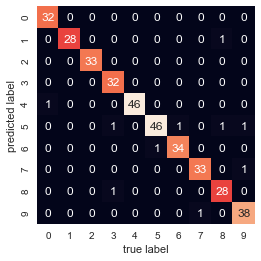

In [52]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');